# Import Library

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import pylab
import missingno as msno
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
def append_predict_class_label(file_path: str, class_labels):
    tmp_pd = pd.read_csv(file_path)
    tmp_pd.update({'class label': class_labels})
    tmp_pd.to_csv('data/data1/data1_test_result.csv', index=False)
    
def plot_data(df,feature, values):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    
    tmp_df = df.copy()
    tmp_df[feature] = values
    tmp_df[feature].hist()
    plt.subplot(1,2,2)
    scipy.stats.probplot(tmp_df[feature],dist='norm',plot=pylab)
    plt.show()

# Data 1

# Exploratory Data Analysis

## Read Data

In [3]:
training_data = pd.read_csv('data/data1/training.csv')
testing_data = pd.read_csv('data/data1/validation.csv')
vaild_data = pd.read_csv('data/data1/test.csv')

In [4]:
training_data.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,class label
0,0.12708,0.36308,0.24832,1.40277,1.78100,0.13906,0.99968,0.68235,0.19462,0.13169,0.15453,0.11412,0.13647,0.42456,0.12294,0.16255,0.15534,0
1,0.13308,0.64109,0.27482,1.59564,2.41907,0.16875,1.12786,0.73878,0.22006,0.17024,0.13643,0.13178,0.13066,0.43593,NaN,0.20954,0.34364,1
2,0.13779,0.47743,0.27204,1.47542,2.12243,0.13874,1.16911,0.93914,0.23281,0.19274,0.13779,0.10636,0.12397,0.45320,0.21130,0.21082,0.23671,2
3,0.15260,0.62122,0.26100,1.78310,2.57567,0.17871,1.45924,0.95658,0.23160,NaN,NaN,0.14805,0.12165,0.43468,NaN,NaN,0.18644,3
4,0.14655,0.49008,0.31137,1.92469,2.30774,0.13056,1.26919,0.88077,0.20706,0.14715,NaN,0.11283,0.13142,0.49452,0.13988,0.15891,0.16434,4


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a1           552 non-null    float64
 1   a2           552 non-null    float64
 2   a3           552 non-null    float64
 3   a4           552 non-null    float64
 4   a5           552 non-null    float64
 5   a6           552 non-null    float64
 6   a7           552 non-null    float64
 7   a8           552 non-null    float64
 8   a9           552 non-null    float64
 9   a10          424 non-null    float64
 10  a11          374 non-null    float64
 11  a12          552 non-null    float64
 12  a13          507 non-null    float64
 13  a14          552 non-null    float64
 14  a15          430 non-null    float64
 15  a16          429 non-null    float64
 16  a17          381 non-null    float64
 17  class label  552 non-null    int64  
dtypes: float64(17), int64(1)
memory usage: 77.8 KB


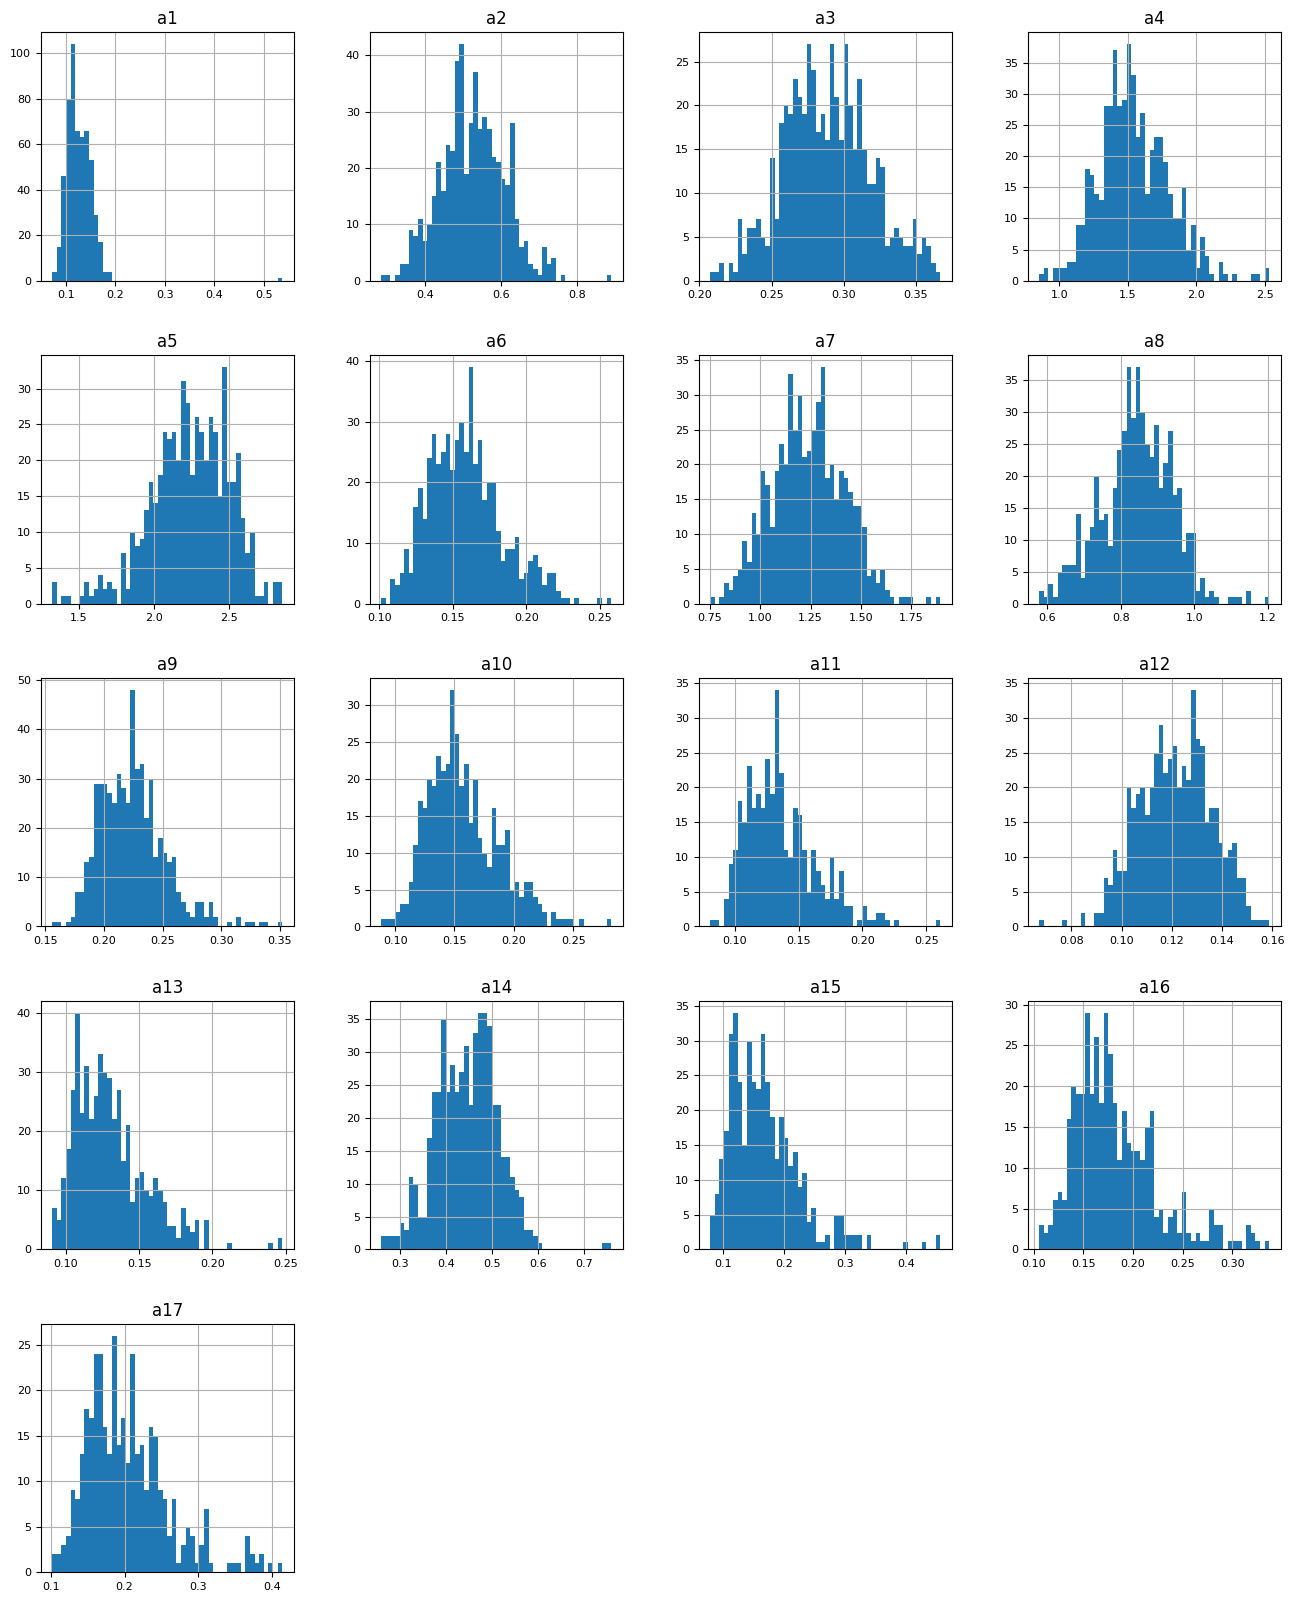

In [6]:
training_data.iloc[:, :-1].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

<AxesSubplot: >

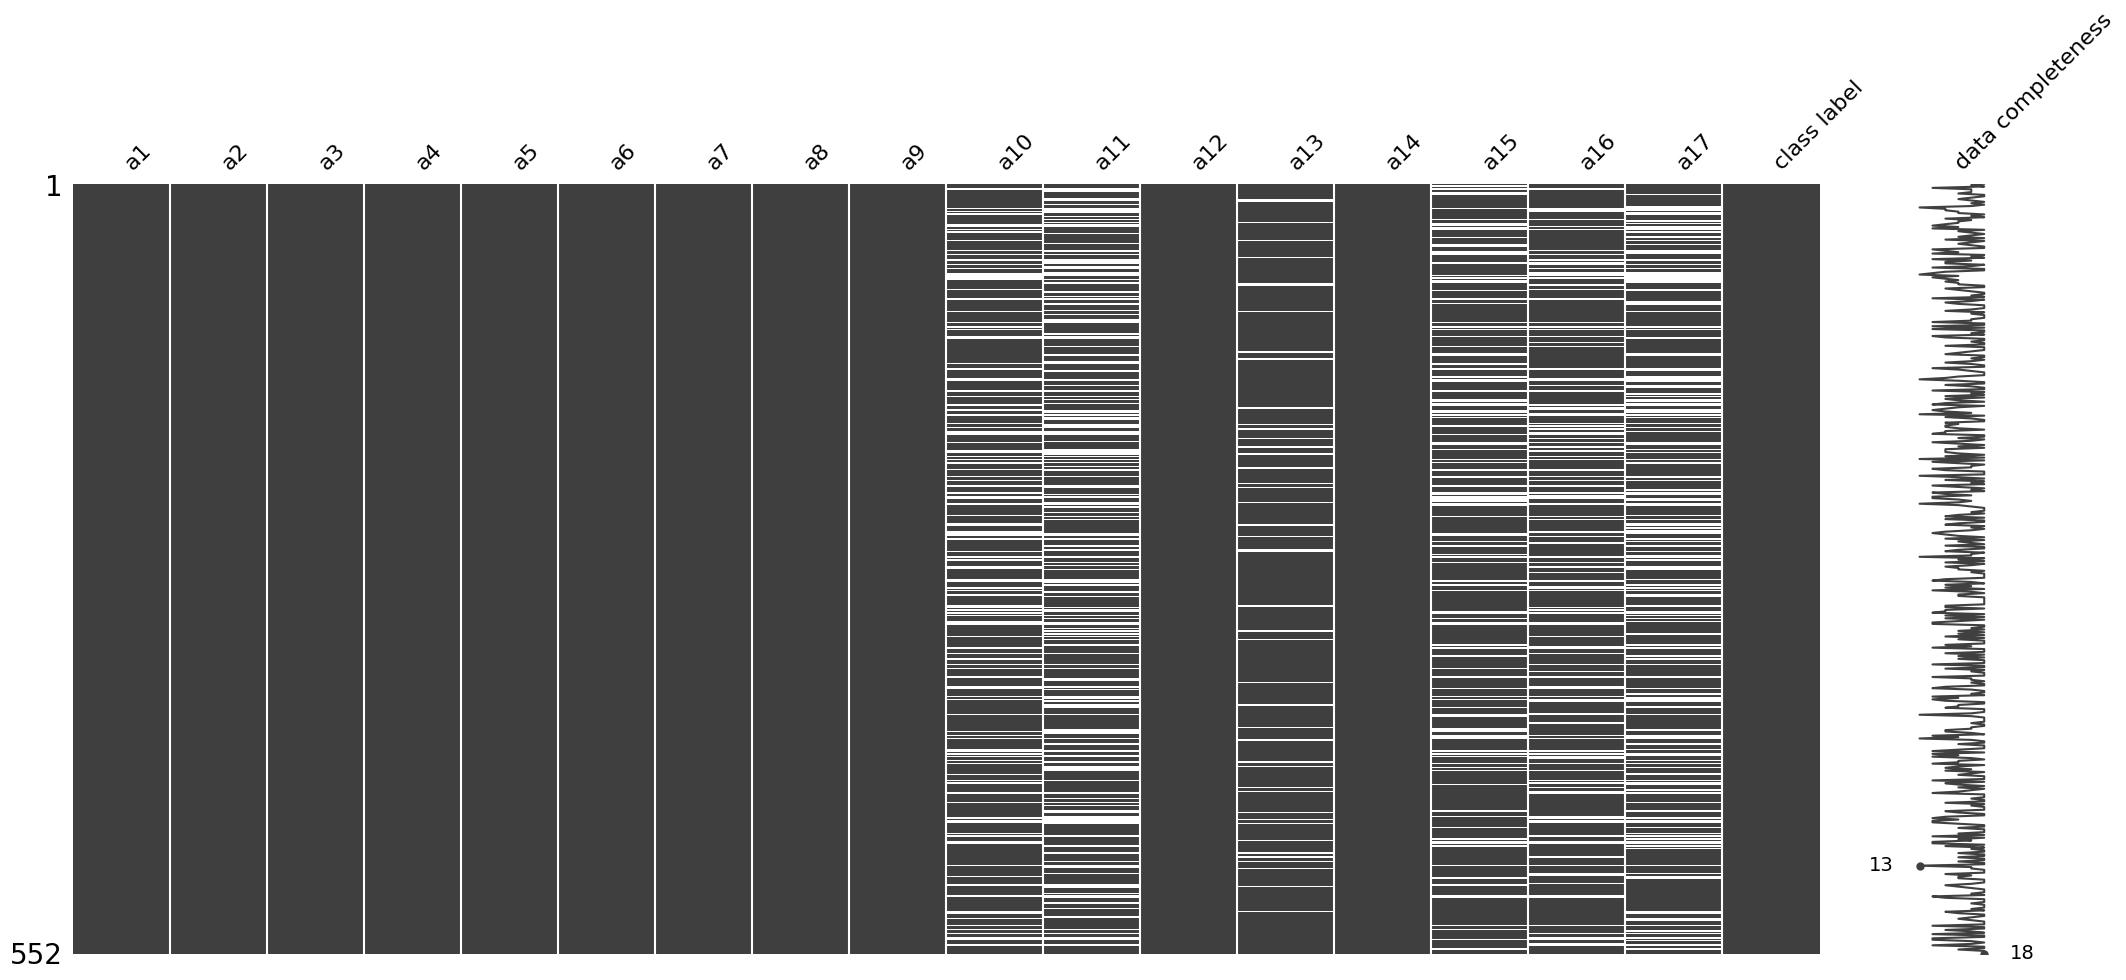

In [7]:
msno.matrix(training_data, labels=True)

In [8]:
# Show how many row for each class label
training_data.iloc[:,-1].value_counts()

6    86
0    78
7    76
3    73
2    70
1    62
4    62
5    45
Name: class label, dtype: int64

<AxesSubplot: >

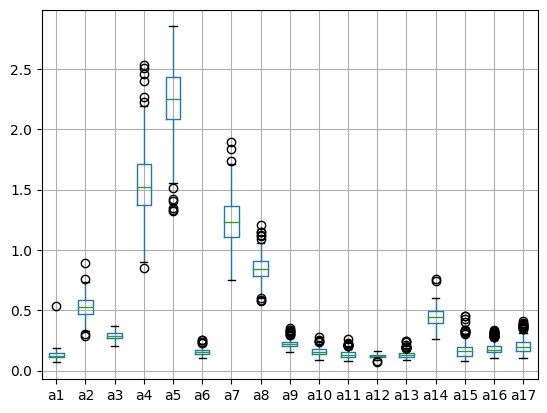

In [9]:
training_data.iloc[:,0: -1].boxplot()

# Remove outliers

In [10]:
# training_data = training_data[(np.abs(scipy.stats.zscore(training_data)) < 3).all(axis=1)]

<AxesSubplot: >

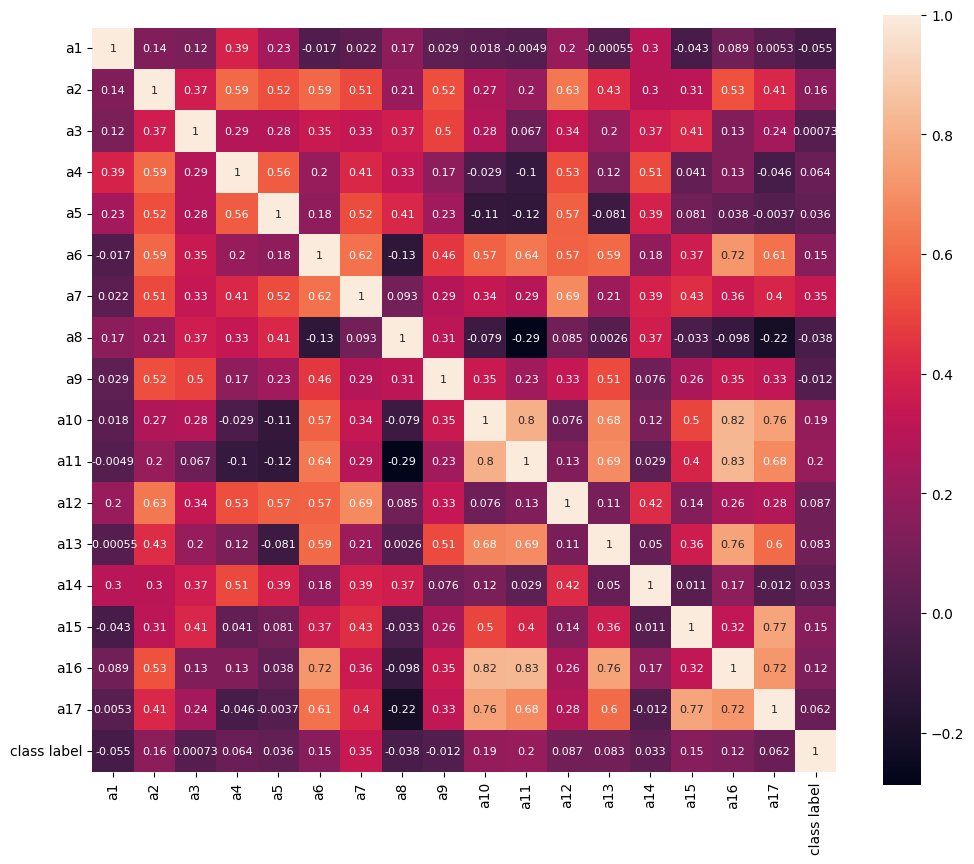

In [11]:
training_data_corr = training_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(training_data_corr, 
        xticklabels=training_data_corr.columns,
        yticklabels=training_data_corr.columns,
        annot=True, annot_kws={"size": 8}, square=True)

In [12]:
training_data_corr['class label']

a1            -0.054504
a2             0.164266
a3             0.000733
a4             0.064393
a5             0.035943
a6             0.152340
a7             0.345192
a8            -0.038292
a9            -0.011713
a10            0.191153
a11            0.195993
a12            0.086603
a13            0.082601
a14            0.032675
a15            0.147476
a16            0.122850
a17            0.062174
class label    1.000000
Name: class label, dtype: float64

In [13]:
#How many NA data
training_data.isna().sum()

a1               0
a2               0
a3               0
a4               0
a5               0
a6               0
a7               0
a8               0
a9               0
a10            128
a11            178
a12              0
a13             45
a14              0
a15            122
a16            123
a17            171
class label      0
dtype: int64

In [14]:
training_data = training_data.fillna(0)
testing_data = testing_data.fillna(0)
vaild_data = vaild_data.fillna(0)

# Find high performance thresholds

In [15]:
from random_forest import RandomForest

# thresholds = [0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
thresholds = [0.03, 0.05, 0.06, 0.14]
best_rfc = None
rfc_score = []


for i, threshold in enumerate(thresholds):
    highly_corr_features = training_data.columns[training_data_corr.corr()['class label'].abs() > threshold].copy()
    dummies_x_subsetted = training_data[highly_corr_features].copy()
    
    rfc = RandomForest(n_estimators=50)
    rfc.fit(dummies_x_subsetted.iloc[:,:-1], training_data.iloc[:,-1])
    
    tmp_test = testing_data[highly_corr_features].copy()
    y_pred = rfc.predict(tmp_test.iloc[:,:-1])
    score = sum(testing_data.iloc[:,-1] == y_pred)/len(y_pred)
    rfc_score.append(score)

high_thresholds =  thresholds[rfc_score.index(max(rfc_score))]

Tree Building: 100% [###########################################] Time: 0:03:35
Tree Building: 100% [###########################################] Time: 0:04:54
Tree Building: 100% [###########################################] Time: 0:04:48
Tree Building: 100% [###########################################] Time: 0:04:50


In [16]:
highly_corr_features = training_data.columns[training_data_corr.corr()['class label'].abs() > high_thresholds].copy()
print(highly_corr_features)
# print("high_thresholds", high_thresholds, "Feature selected:", highly_corr_features)

training_data_corr = training_data[highly_corr_features].copy()
testing_data_corr = testing_data[highly_corr_features].copy()
vaild_data_corr = vaild_data[highly_corr_features].copy()

Index(['a1', 'a2', 'a3', 'a4', 'a5', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12',
       'a14', 'a15', 'class label'],
      dtype='object')


In [17]:
rfc = RandomForest(n_estimators=100)
rfc.fit(training_data_corr.iloc[:, :-1], training_data_corr.iloc[:,-1])

Tree Building: 100% [###########################################] Time: 0:07:24


# RandomForestClassifier in sklearn
It can get higher performance

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1, n_estimators=100)
rfc.fit(training_data_corr.iloc[:, :-1], training_data_corr.iloc[:,-1])

RandomForestClassifier(random_state=1)

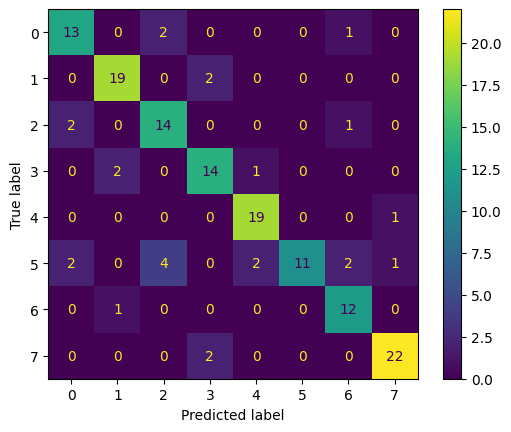

Correct Prediction are: 124
In Correct Prediction are: 26
Accuracy: 0.8266666666666667
Macro: 0.8180047399824866
Micro 0.8266666666666667


In [19]:
y_test = testing_data_corr.iloc[:,-1]
y_pred = rfc.predict(testing_data_corr.iloc[:,:-1])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=np.unique(training_data.iloc[:,-1]))
disp.plot()
plt.show()
print("Correct Prediction are:", sum(y_test == y_pred))
print("In Correct Prediction are:", sum(y_test != y_pred))
print("Accuracy:", sum(y_test == y_pred)/len(y_pred))
print("="*20)

print("Macro:", f1_score(y_test, y_pred, average='macro'))
print("Micro", f1_score(y_test, y_pred, average='micro'))

print("="*20)

In [20]:
y_pred = rfc.predict(vaild_data_corr.iloc[:,:-1])

In [21]:
y_pred = rfc.predict(vaild_data_corr.iloc[:,:-1])
append_predict_class_label('data/data1/test.csv', pd.Series(y_pred, dtype="Int64"))